### Libraries

In [27]:
import os
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

#### defining the rectangle size for plotting the figure



In [28]:
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

### Reading data
Dataset link:http://data.dft.gov.uk/road-accidents-safety-data/DfTRoadSafety_Casualties_2014.zip



In [30]:
#os.chdir(r'E:\training\Projects\Vehicle_traffic_data_mining')
#df=h2o.import_frame(path='E:\training\Projects\Vehicle_traffic_data_mining\DfTRoadSafety_Accidents_2014.csv')
df=pd.read_csv('DfTRoadSafety_Casualties_2014.csv')


### Selecting Features

In [31]:
Features=df[['Casualty_Type','Age_Band_of_Casualty','Casualty_Class',
    'Pedestrian_Location','Car_Passenger','Pedestrian_Movement','Vehicle_Reference']]


### Defining Severity

In [32]:
Severity=df[['Casualty_Severity']]
#print(Severity)
#Label=np.zeros(len(Severity))
ind=Severity==3
Label=[]
for i in np.array(ind):
    if i==True:
        Label.append(1)
    else:
        Label.append(0)

### Appending the label list

In [33]:
Label=np.array(Label)

### Training - 80% data
### Testing- 20% data





In [34]:
numFeatures=len(Features)
numTrainFeatures=np.floor(0.8*numFeatures)
numTestFeatures=numFeatures-numTrainFeatures
ind=random.sample(range(numFeatures),(numFeatures))

In [35]:
trainIndices=ind[1:int(numTrainFeatures)]
testIndices=ind[int(numTrainFeatures+1):]
trainFeatures=Features.loc[trainIndices,:]
trainLabels=Label[trainIndices[:]];
testFeatures=Features.loc[testIndices,:]
testLabels=Label[testIndices[:]]


### Random forest classifier


In [36]:
rf = RandomForestClassifier(n_estimators=100) # initialize
rf.fit(trainFeatures,trainLabels) # fit the data to the algorithm
results = rf.predict(trainFeatures)
ind=(results==trainLabels);
ind=list(ind);
trainAcc_tree=float(ind.count(True))/float(len(trainLabels));
print('Training Accuracy is:',trainAcc_tree*100);
results = rf.predict(testFeatures)
ind=(results==testLabels);
ind=list(ind);
testAcc_tree=float(ind.count(True))/float(len(testLabels));
print ('Testing Accuracy is:',testAcc_tree*100);

Training Accuracy is: 87.48103869391952
Testing Accuracy is: 87.28628358400823


### Age casuality

In [37]:
age_caus={}
L=[0,6,11,16,21,26,31,36,41,46,51,56]
for i in range(0,len(L)-1) :
    band=float(len(df.loc[((df.Age_of_Casualty>=i) & (df.Age_of_Casualty<=i+5)),:]))/len(df)*100;
    #print(band)
    age_caus[str(L[i])+'-'+str(L[i+1])]=band;

### Male casuality


In [38]:
male_caus=float(len(df.loc[(df.Sex_of_Casualty==1),:]))/len(df)*100
print ('male_caus',male_caus)

male_caus 59.16432277338708


### Female casuality

In [39]:
female_caus=float(len(df.loc[(df.Sex_of_Casualty==2),:]))/len(df)*100
print ('female_caus',female_caus)

female_caus 40.834134627745186


#### Distribution of causuality between car passengers and pedestrians



In [40]:
# Distribution of causuality between car passengers and pedestrians
no_car_passenger=float(len(df.loc[(df.Car_Passenger==0),:]))/len(df)*100
print ('no_car_passenger',no_car_passenger)

no_car_passenger 80.82806707219878


#### Front seat passenger

In [41]:
front_seat_passenger=float(len(df.loc[(df.Car_Passenger==1),:]))/len(df)*100
print ('front_seat_passenger',front_seat_passenger)

front_seat_passenger 12.137682090941345


#### Back seat passenger

In [42]:
rare_seat_passenger=float(len(df.loc[(df.Car_Passenger==2),:]))/len(df)*100
print ('rare_seat_passenger',rare_seat_passenger)

rare_seat_passenger 7.033736637237309


In [47]:
data=[no_car_passenger,front_seat_passenger,rare_seat_passenger];

#### Plotting the figure








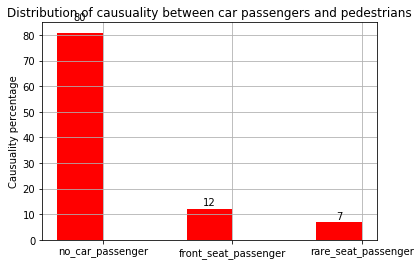

In [49]:
fig, ax = plt.subplots()
ind=np.arange(3)
width=0.35
react=ax.bar(ind,data,width,color='r')
ax.set_ylabel('Causuality percentage')
ax.set_title('Distribution of causuality between car passengers and pedestrians')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(( 'no_car_passenger','front_seat_passenger','rare_seat_passenger'))
autolabel(react)
plt.grid(True)
plt.show()

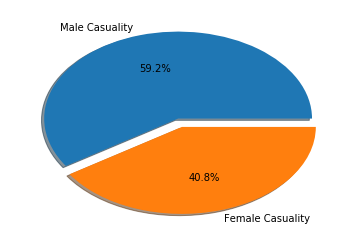

In [45]:
labels=['Male Casuality ','Female Casuality']
data=[male_caus,female_caus];
explode=(0.0,0.1)
plt.pie(data,explode=explode,labels=labels,shadow=True, autopct='%1.1f%%')
plt.show()



In [50]:
age_caus

{'0-6': 1.8706582269368615,
 '11-16': 2.6049352879774985,
 '16-21': 2.8255269260632363,
 '21-26': 2.989042406042874,
 '26-31': 3.2091198445060343,
 '31-36': 3.554661990878099,
 '36-41': 3.86215336517943,
 '41-46': 4.126451971184252,
 '46-51': 4.345501010402258,
 '51-56': 4.596944625842644,
 '6-11': 2.317497698956689}

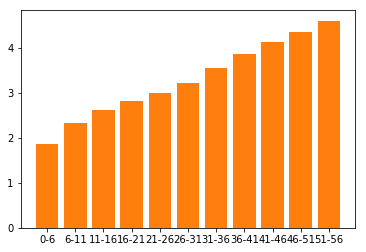

In [75]:
plt.bar(range(len(age_caus)), age_caus.values(), align='center')
plt.xticks(range(len(age_caus)), age_caus.keys())
plt.show()